In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sympy as sp
from scipy.integrate import odeint

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='jshtml')
import seaborn as sns

#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('talk', font_scale=0.9,  rc={"lines.linewidth": 5})

### Constantes

In [3]:
m1 = 10.0 #Massa
m2 = 10.0 #Massa
k = 1.0 #Constante da força

### Definição da força em coordenadas cartesianas

In [4]:
def F1(x1,x2):
    """
    Vetor força.
    
    :param x1: posição da primeira partícula
    :param x2: posição da segunda partícula
    
    :return: Força (1D)
    """
    if x1 == x2: return 0.0
    
    return  -k/(x1-x2)**2

def F2(x1,x2):
    
    return -F1(x1,x2)

### Definição da posição e velocidade no instante t = t0

In [5]:
x10,x20 = 0.0,5.0
v10,v20 = 0.0,0.0 #Corpo inicialmente em repouso

### Solução das eqs. de movimento:

In [6]:
#Formato: w[t] = [x1(t),x2(t),v1(t),v2(t)], dw/dt = [v1,v2,F1/m,F2/m]
def RHS(w,t):
    x1 = w[0]
    x2 = w[1]
    v1 = w[2]
    v2 = w[3]
    a1 = F1(x1,x2)/m1
    a2 = F2(x1,x2)/m2
    return np.array([v1,v2,a1,a2])

w0 = np.array([x10,x20,v10,v20]) #Condições iniciais

t0 = 0 #instante no qual as condições iniciais são definidas
tf = 100 #instante final para calcular as soluções
n = 1000 #número de pontos entre t0 e tf para calcular as soluções

tlist = np.linspace(t0,tf,n) #lista de valores para calcular as soluções r(t) e v(t)

w_sol = odeint(RHS,w0,tlist) #Solução

x1_sol = w_sol[:,0]
x2_sol = w_sol[:,1]
v1_sol = w_sol[:,2]
v2_sol = w_sol[:,3]


### Plot da solução

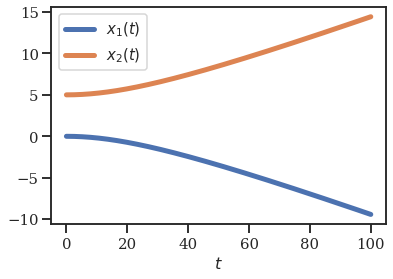

In [7]:
plt.plot(tlist,x1_sol,label=r'$x_1(t)$')
plt.plot(tlist,x2_sol,label=r'$x_2(t)$')
plt.legend()
plt.xlabel(r'$t$')
plt.savefig('aulaExercicios6_1.png')
plt.show()

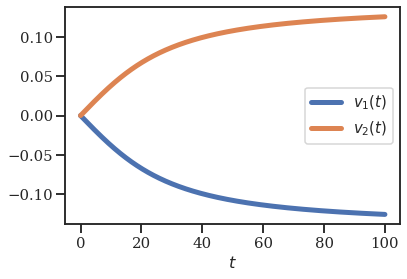

In [8]:
plt.plot(tlist,v1_sol,label=r'$v_1(t)$')
plt.plot(tlist,v2_sol,label=r'$v_2(t)$')
plt.legend()
plt.xlabel(r'$t$')
plt.savefig('aulaExercicios6_2.png')
plt.show()

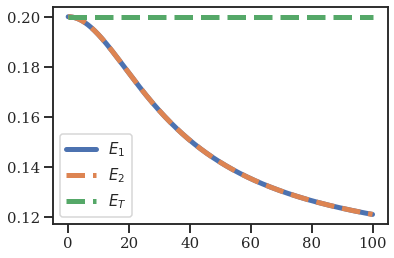

In [9]:
K1 = m1*v1_sol**2/2
K2 = m2*v2_sol**2/2
U1 = k/(x2_sol-x1_sol)
U2 = k/(x2_sol-x1_sol)
E1 = K1 + U1
E2 = K2 + U2
ET = K1 + K2 + (U1+U2)/2.0
plt.plot(tlist,E1,label=r'$E_1$')
plt.plot(tlist,E2,linestyle='--',label=r'$E_2$')
plt.plot(tlist,ET,linestyle='--',label=r'$E_T$')
plt.legend()
plt.savefig('aulaExercicios6_3.png')
plt.show()

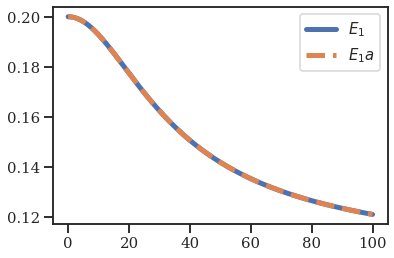

In [10]:
K1 = m1*v1_sol**2/2
K2 = m2*v2_sol**2/2
U1 = k/(x2_sol-x1_sol)
U2 = k/(x2_sol-x1_sol)
E1 = K1 + U1
E2 = K2 + U2
ET = K1 + K2 + (U1+U2)/2.0
plt.plot(tlist,E2,label=r'$E_1$')
plt.plot(tlist,k*(x2_sol/x20)/(2*x2_sol-x20),linestyle='--',label=r'$E_1a$')
plt.legend()
plt.show()